In [1]:
import pandas as pd
# import sqlite3
import matplotlib.pyplot as plt

1. Use the data from the file, read it to a dataframe and make any modification that you may find useful to solve the task
2. The figsize is still the same, you can choose whatever fontsize you like
3. The color palette should be the same as in the example
4. The fontsize of the title is 15
5. The width of the box lines is 3, the width of the median lines is 2
file_data = pd.read_csv('../data/ab-test.csv', sep=',') 
data.info(memory

In [2]:
df = pd.read_csv('../data/ab-test.csv', sep=',') 
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uid     44 non-null     object 
 1   diff    44 non-null     float64
 2   time    44 non-null     object 
 3   group   44 non-null     object 
dtypes: float64(1), object(3)
memory usage: 7.6 KB


In [3]:
object_cols = df.select_dtypes(include='object').columns
df[object_cols] = df[object_cols].astype('category')
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   uid     44 non-null     category
 1   diff    44 non-null     float64 
 2   time    44 non-null     category
 3   group   44 non-null     category
dtypes: category(3), float64(1)
memory usage: 2.8 KB


In [4]:
df

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test
5,user_19,-148.000000,before,test
6,user_21,-78.500000,after,test
7,user_21,-112.500000,before,test
8,user_25,-127.500000,after,test
9,user_25,-69.333333,before,test


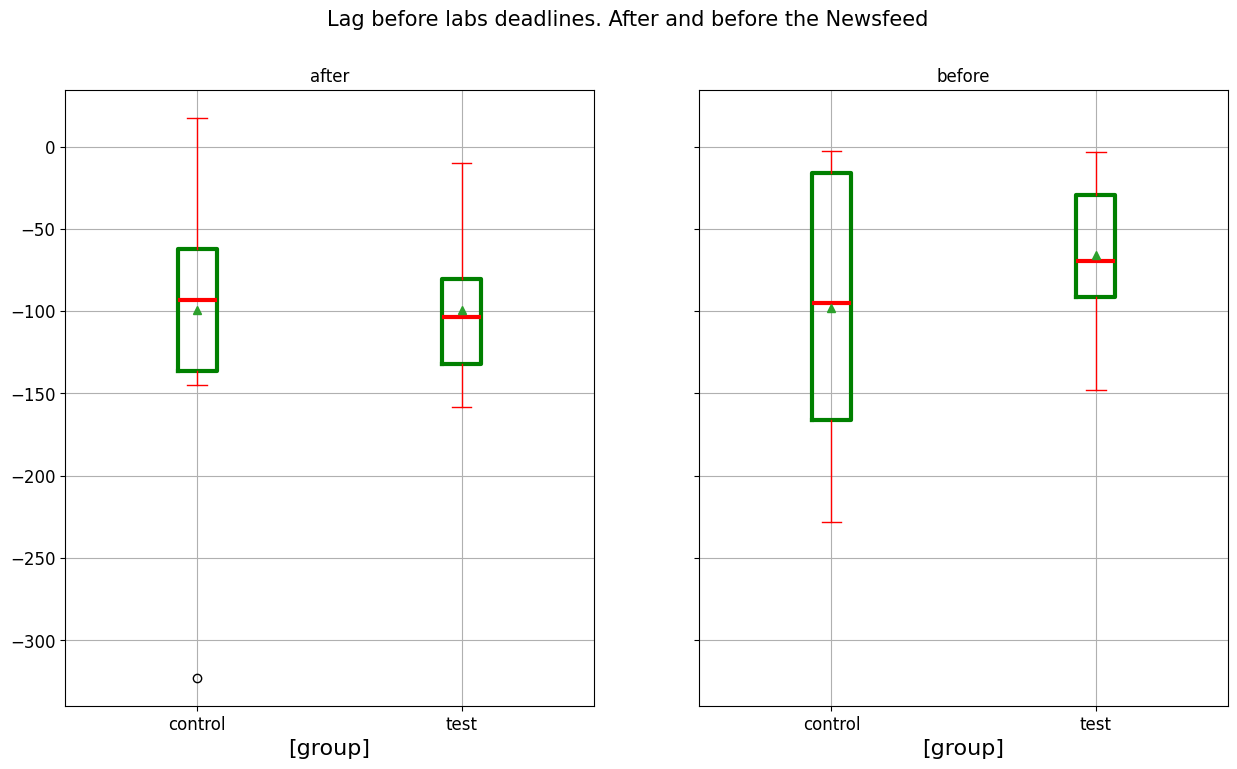

In [5]:
# создаем объект фигуры picture и массив из 2-х графиков graph в один ряд
picture, graph = plt.subplots(1, 2, sharey=True)

picture.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)

#определяем ширину и высоту фигуры 
picture.set_figwidth(15.0)
picture.set_figheight(8.0)

for index, name in enumerate(('after', 'before')):
    graph[index].boxplot([
        df['diff'][(df['group'] == 'control') & (df['time'] == name)],
        df['diff'][(df['group'] == 'test') & (df['time'] == name)]],
        tick_labels=['control', 'test'],
        showmeans=True,
        boxprops={'linewidth': 3, 'color': 'green'},
        medianprops={'linewidth': 3, 'color': 'red'},
        capprops={'color': 'red'},
        whiskerprops={'color': 'red'}
    )
    
    graph[index].set_title(name)
    graph[index].grid()
    graph[index].set_xlabel('[group]', fontsize=16)
    graph[index].tick_params(axis='x', labelsize=12)
    graph[index].tick_params(axis='y', labelsize=12)

plt.show()

“What was the IQR of the control group before the newsfeed?”

Answer: IQR = Q3-Q1 = -10 - (-160) = ***150***